In [ ]:
# !pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [ ]:
# Using dataset given to you in previous self practice task.
# Loading Data from a JSON File
with open('/content/drive/MyDrive/Colab Notebooks/ML/Lab 4/order_cancellation_data.json', 'r') as file:
    data = pd.read_json(file)

In [ ]:
report = ProfileReport(data)
# report.to_file('data_profile_report.html')

In [ ]:
# Replacing the categorical feature in the 'order_status' column.
data['order_status'] = data['order_status'].replace({'F':1, 'C':0})

In [ ]:
# Sorting the data by date and dropping this column.
data.sort_values(by='order_create_time', inplace=True)
data.drop('order_create_time', axis=1, inplace=True)

In [ ]:
# Dropping rows with zero values in the "total_order_items" column.
data = data[data['total_order_items'] > 0]
# Removing outliers (dropping all values greater than the 95th percentile).
data = data[data['total_order_items'] <= 8]

In [ ]:
# I'm filling the missing (NaN) values in the "cost(USD)" column with the mean values.
data['cost(USD)'].fillna(data['cost(USD)'].mean(), inplace=True)
# I'm dropping rows with values less than 8 in the "cost(USD)" column.
data = data[data['cost(USD)'] >= 8]
# I'm removing outliers by dropping all values that are greater than the 95th percentile in the "cost(USD)" column.
data = data[data['cost(USD)'] <= 21.32]

In [ ]:
# I'm dropping rows with zero values in the "payment_type" column.
data['payment_type'].dropna(inplace=True)

# We will convert categorical features into numerical ones using one-hot encoding.
data = pd.get_dummies(data, columns=['payment_type'])

In [ ]:
# Filling in missing (NaN) values in the "vendor_client_distance" column with the mean values.
data['vendor_client_distance'].fillna(data['vendor_client_distance'].mean(), inplace=True)
# Removing outliers by dropping all values greater than the 95th percentile in the "vendor_client_distance" column.
data = data[data['vendor_client_distance'] <= 9818]

In [ ]:
# Filling missing (NaN) values in the "estimated_delivery_time" column with the mean values.
data['estimated_delivery_time'].fillna(data['estimated_delivery_time'].mean(), inplace=True)
# Removing outliers by dropping all rows with values greater than the 95th percentile in the "estimated_delivery_time" column.
data = data[data['estimated_delivery_time'] <= 102]

In [ ]:
# Filling missing (NaN) values in the "predicted_order_preparation_time" column with the mean values.
data['predicted_order_preparation_time'].fillna(data['predicted_order_preparation_time'].mean(), inplace=True)
# Removing outliers by dropping all rows with values greater than the 95th percentile in the "predicted_order_preparation_time" column.
data = data[data['predicted_order_preparation_time'] <= 31]

In [ ]:
data.drop('vendor_id', axis=1, inplace=True)

In [ ]:
# We split the data into features and the target variable.
X = data.drop('order_status', axis=1)
y = data[['order_status']]

In [ ]:
# Divide the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)

In [ ]:
# Data balancing
smote = SMOTE()
X_train_resampled, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

## <center>Self-practice Task</center>

Using the data from Assignment 1 classification task filter out the minor class and use One class SVM to predict if an order is going to be cancelled or not.

<b>Note : Do not use the whole training dataset but just sample 10-20% to train the one class svm<b>

In [ ]:
# Получается, нам нужно взять такие данные. что в X лежит массив в с массивами, предположительно координаты точек.
# А в y лежит массив с значениями 0 и 1.
# Как это сделать с моими данными?

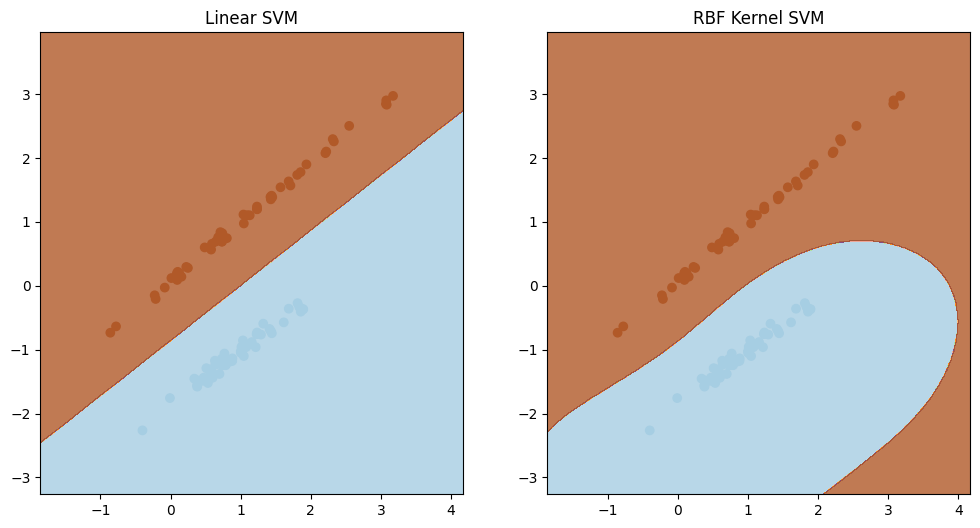

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Создание случайных данных для визуализации
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
# X = X["total_order_items"]

# Создание сетки для визуализации
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Обучение разных типов SVM
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X, y)
svm_rbf.fit(X, y)

# Предсказание классов на сетке
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Отображение данных и решающей границы
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Linear SVM')

plt.subplot(122)
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('RBF Kernel SVM')

plt.show()


In [ ]:
from sklearn.svm import OneClassSVM

# Создайте и обучите модель One-Class SVM
svm = OneClassSVM()
svm.fit(X_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1: {f1}")